In [2]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('S&P500_5yrs.csv')

del data['Date']
del data['Open']
del data['Low']
del data['High']
data.head()

,Close/Last
0,4217.04
1,4224.16
2,4278.00
3,4314.60
4,4373.20


In [6]:
data = np.array(data)

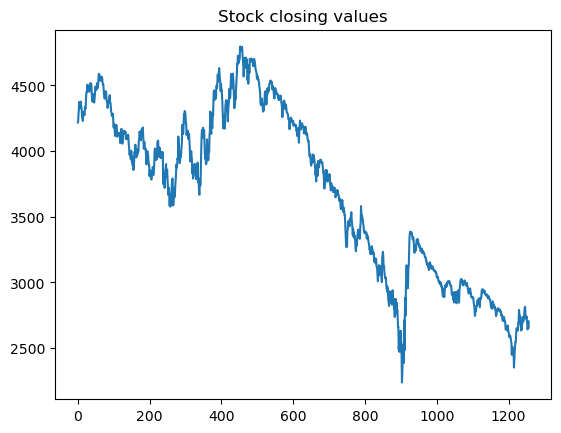

In [95]:
plt.figure()
plt.plot(range(len(data)),data)
plt.title('Stock closing values')
plt.show()

Kalman gain error in estimate/(e est + e measured)


In [4]:
def kalman_gain(p_, r):
    return p_ / (r + p_)

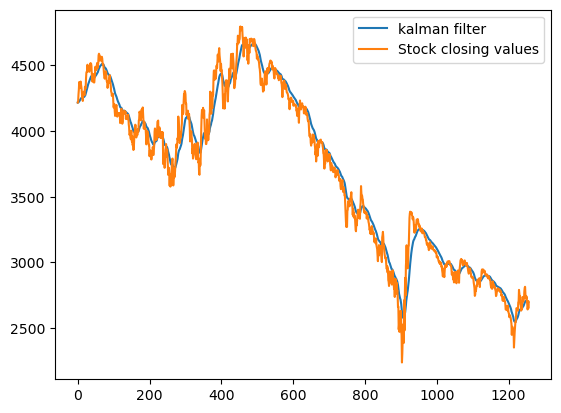

In [96]:
inital_state = data[0]
inital_state_covariance = 0.4
process_noise = 45
measurement_noise = 8000

estimated_value = []

state = inital_state
state_covariance = inital_state_covariance

for i in range(1,len(data)):
    #predction
    predicted_state = state
    predicted_state_covariance = state_covariance + process_noise
    #update
    kg = kalman_gain(predicted_state_covariance,measurement_noise)
    state = predicted_state + kg*(data[i] - predicted_state)
    state_covariance = (1-kg)* predicted_state_covariance
    estimated_value.append(state)

plt.plot(range(len(estimated_value)),estimated_value, label = 'kalman filter')
plt.plot(range(len(data)),data, label='Stock closing values')
plt.legend()
plt.show()